#### K-Fold Cross Validation  implementation

***Modelling Non Linear relationships and getting insights from data***
***Problem Identification***
- mission is to predict which of the previous customers will buy a brand new car released by the company
- Using the given [DataSet](../dataFiles/Social_Network_Ads.csv)
- Features include: Age, EstimatedSalary as independent variables
- Purchased - as the dependent variable

- model should predict for new customers of a given age and salary range the model should make a prediction, these customers can then be targetted by the relevant marketing Ads

***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing the Dataset***

In [ ]:
dataset = pd.read_csv("../dataFiles/Social_Network_Ads.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f'{x[:10]}\n{y[:10]}') # print first 10 records for testing purposes

***Splitting the dataset into the Training Set and the Test Set***

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(f'{x_train[:10]} \n{x_test[:10]}')


***Training the Kernel SVM model on the Training Set***

In [6]:
from sklearn.svm import SVC
#input kernels
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

***Predicting a new result***

In [7]:
print(classifier.predict(sc.transform([[30, 87]])))

[0]


***Predicting the test set Results***

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

***Making the confusion Matrix***

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[47  5]
 [ 1 27]]


0.925

***Applying K-fold Cross Validation***
![K-FOLD Cross Validation Illustration](../dataFiles/k-foldxVal.png)
- creating 10 different test tests to ensure there is no bias in test set selection - reduces possibility of getting lucky
- final accuracy is average across the 10 test sets
- accuracies = list of accuracies from the 10 test folds and compute their mean
- cv = train  test folds



In [12]:
from sklearn.model_selection import cross_val_score
accuracies =cross_val_score(estimator= classifier, X =x_train, y=y_train, cv=10)
print(f'Accuracy: {accuracies.mean()%100:.2f}%')
print(f'Standard Deviation: {accuracies.std()%100:.2f}%') # indicates the variance

Accuracy: 0.91%
Standard Deviation: 0.05%


***Visualising the Training set results***

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1948\1862305616.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


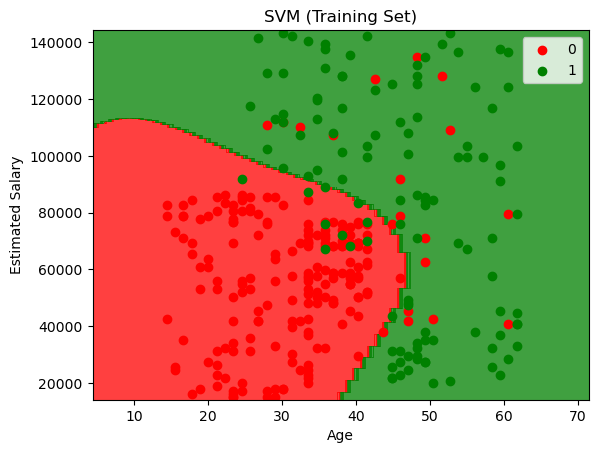

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_train), y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step= 1),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 1))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

***Visualising the Test Set Results***

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16056\2904050604.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


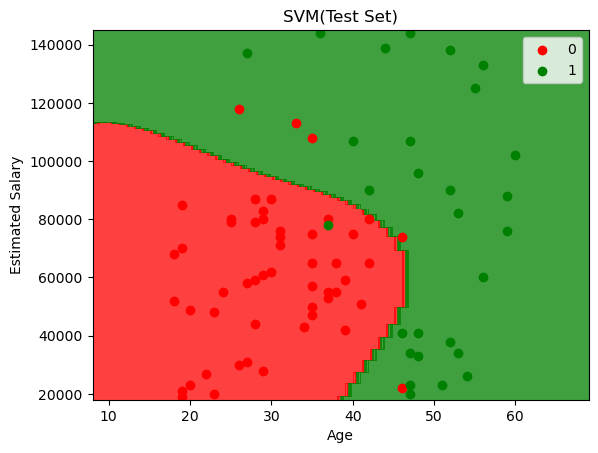

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_test), y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step=1),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 1))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Kernel SVM 
